In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf
from scipy.stats import norm


In [3]:
df = pd.read_csv('us-shareprices-daily.csv',sep=';')
df.head()
#df.to_csv('df.csv')
#df.reset_index(inplace=True)
#display(df)

,Ticker,SimFinId,Date,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
0,GOOG,18,2016-10-24,40.24,40.24,40.76,40.66,40.66,NaN,33950280,1.378272e+10
1,GOOG,18,2016-10-25,40.83,40.26,40.83,40.38,40.38,NaN,31528080,1.378272e+10
2,GOOG,18,2016-10-26,40.32,39.82,40.35,39.95,39.95,NaN,32954660,1.378272e+10
3,GOOG,18,2016-10-27,40.05,39.58,40.17,39.77,39.77,NaN,54984420,1.378477e+10
4,GOOG,18,2016-10-28,40.42,39.68,40.77,39.77,39.77,NaN,85398040,1.378477e+10


In [4]:
sp500 = yf.download (tickers = "^GSPC", start = "2016-10-24",end = "2021-10-23", interval = "1d")
sp500 = sp500['Adj Close']
sp500 = pd.DataFrame(sp500)
sp500.rename(columns={'Adj Close': 'sp500'}, inplace=True)
sp500.head(2)


[*********************100%***********************]  1 of 1 completed


,sp500
Date,
2016-10-24,2151.330078
2016-10-25,2143.159912


In [5]:
#sp500.reset_index(inplace=True)
#sp500

In [6]:
stocks_name = df['Ticker'].unique()
#stocks_name
df_by_stock= df.pivot(index='Date',columns='Ticker')
df_by_stock

SimFinId                                                   \
Ticker            A        AA      AAL      AAMC      AAME       AAN   
Date                                                                   
2016-10-24  45846.0  367153.0  68568.0  847094.0  450021.0       NaN   
2016-10-25  45846.0  367153.0  68568.0  847094.0  450021.0       NaN   
2016-10-26  45846.0  367153.0  68568.0  847094.0  450021.0       NaN   
2016-10-27  45846.0  367153.0  68568.0  847094.0  450021.0       NaN   
2016-10-28  45846.0  367153.0  68568.0  847094.0  450021.0       NaN   
...             ...       ...      ...       ...       ...       ...   
2021-10-18  45846.0  367153.0  68568.0  847094.0  450021.0  441241.0   
2021-10-19  45846.0  367153.0  68568.0  847094.0  450021.0  441241.0   
2021-10-20  45846.0  367153.0  68568.0  847094.0  450021.0  441241.0   
2021-10-21  45846.0  367153.0  68568.0  847094.0  450021.0  441241.0   
2021-10-22  45846.0  367153.0  68568.0  847094.0  450021.0  441241.0   

                                                    ... Shares Outstanding  \
Ticker          AAOI      AAON       AAP      AAPL  ...               ZNGA   
Date                                                ...                      
2016-10-24  671827.0  919501.0  184955.0  111052.0  ...       8.893280e+08   
2016-10-25  671827.0  919501.0  184955.0  111052.0  ...       8.893280e+08   
2016-10-26  671827.0  919501.0  184955.0  111052.0  ...       8.893280e+08   
2016-10-27  671827.0  919501.0  184955.0  111052.0  ...       8.893280e+08   
2016-10-28  671827.0  919501.0  184955.0  111052.0  ...       8.893280e+08   
...              ...       ...       ...       ...  ...                ...   
2021-10-18  671827.0  919501.0  184955.0  111052.0  ...       1.120181e+09   
2021-10-19  671827.0  919501.0  184955.0  111052.0  ...       1.120181e+09   
2021-10-20  671827.0  919501.0  184955.0  111052.0  ...       1.120181e+09   
2021-10-21  671827.0  919501.0  184955.0  111052.0  ...       1.120181e+09   
2021-10-22  671827.0  919501.0  184955.0  111052.0  ...       1.120181e+09   

                                                                            \
Ticker              ZOM           ZS          ZTS        ZUMZ          ZUO   
Date                                                                         
2016-10-24          NaN          NaN  494240780.0  24931000.0          NaN   
2016-10-25          NaN          NaN  494240780.0  24931000.0          NaN   
2016-10-26          NaN          NaN  494240780.0  24931000.0          NaN   
2016-10-27          NaN          NaN  494240780.0  24931000.0          NaN   
2016-10-28          NaN          NaN  494240780.0  24931000.0          NaN   
...                 ...          ...          ...         ...          ...   
2021-10-18  979738168.0  138735981.0  474766701.0  25164434.0  124600000.0   
2021-10-19  979738168.0  138735981.0  474766701.0  25164434.0  124600000.0   
2021-10-20  979738168.0  138735981.0  474766701.0  25164434.0  124600000.0   
2021-10-21  979738168.0  138735981.0  474766701.0  25164434.0  124600000.0   
2021-10-22  979738168.0  138735981.0  474766701.0  25164434.0  124600000.0   

                                                             
Ticker             ZVO           ZY        ZYNE        ZYXI  
Date                                                         
2016-10-24  63883000.0          NaN   9628278.0  34398357.0  
2016-10-25  63883000.0          NaN   9628278.0  34398357.0  
2016-10-26  63883000.0          NaN   9628278.0  34398357.0  
2016-10-27  63883000.0          NaN   9628278.0  34398357.0  
2016-10-28  63883000.0          NaN   9628278.0  34398357.0  
...                ...          ...         ...         ...  
2021-10-18  33446000.0  102389838.0  41251537.0  38252195.0  
2021-10-19  33446000.0  102389838.0  41251537.0  38252195.0  
2021-10-20  33446000.0  102389838.0  41251537.0  38252195.0  
2021-10-21  33459695.0  102389838.0  41251537.0  38252195.0  
2021-10-22

In [7]:
# dropping SimFinID, Dividend, and Shares Outstanding columns
df_by_stock = df_by_stock.drop(['SimFinId','Dividend','Shares Outstanding'],axis=1)

In [8]:
# merging stocks with sp500 data
data = df_by_stock['Adj. Close']
dd =pd.merge(data, sp500, left_index=True, right_index=True)
#dd.tail(15)


In [9]:
# reseting index for DataTime index
dd.reset_index(inplace=True)
dd.to_csv('dd.csv')

display(dd)

,Date,A,AA,AAL,AAMC,AAME,AAN,AAOI,AAON,AAP,...,ZOM,ZS,ZTS,ZUMZ,ZUO,ZVO,ZY,ZYNE,ZYXI,sp500
0,2016-10-24,43.71,20.78,38.39,37.55,4.02,NaN,21.59,28.57,133.65,...,1.32,NaN,49.14,22.35,NaN,6.81,NaN,11.90,0.27,2151.330078
1,2016-10-25,41.47,21.03,38.26,32.85,4.12,NaN,21.15,28.33,136.22,...,1.32,NaN,48.14,22.45,NaN,6.85,NaN,11.48,0.27,2143.159912
2,2016-10-26,41.34,20.78,37.90,32.95,4.02,NaN,21.39,27.95,136.36,...,1.17,NaN,46.96,22.10,NaN,6.93,NaN,11.43,0.27,2139.429932
3,2016-10-27,41.35,20.98,38.47,32.50,4.02,NaN,19.99,28.29,131.87,...,1.13,NaN,46.96,21.65,NaN,6.79,NaN,11.13,0.27,2133.040039
4,2016-10-28,41.20,21.18,38.61,32.88,4.02,NaN,19.69,28.24,132.80,...,1.13,NaN,46.76,21.60,NaN,6.76,NaN,11.03,0.22,2126.409912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2021-10-18,153.81,56.84,19.84,23.96,4.23,27.57,7.16,70.44,216.10,...,0.51,301.31,201.44,40.83,20.08,2.30,12.62,3.90,10.85,4486.459961
1255,2021-10-19,154.64,53.30,19.53,24.27,4.13,27.79,7.42,71.04,217.67,...,0.51,298.03,203.14,40.15,20.66,2.30,11.00,4.02,11.27,4519.629883
1256,2021-10-20,156.60,52.14,19.52,26.31,4.23,28.48,7.41,70.13,220.12,...,0.51,297.67,205.00,40.32,20.48,2.30,10.85,4.02,11.30,4536.189941
1257,2021-10-21,155.95,49.64,19.89,25.68,4.17,28.74,7.52,69.84,226.96,...,0.51,305.69,207.30,41.20,21.34,2.32,10.99,4.13,11.09,4549.779785


In [113]:
class CAPM(object):
    def __init__(self,tickers_quantity,dataset):
        self.dataset = dataset
    
    def tickers_return(self,tickers_quantity):
        tickers = []
        quantity = []
        for key,values in tickers_quantity.items():
            tickers.append(key)
            quantity.append(values)
        tickers.append('sp500')
        selected_stocks=self.dataset[tickers]
        ## calculating daily return
        # loops through each stocks
        # loops through each row belonging to the stock
        # calculates the percentage change from previous day
        # sets the value of first row to zero since there is no previous value
        df_stocks =selected_stocks.copy()
        for i in selected_stocks.columns[1:]:
            for j in range(1, len(selected_stocks)):
                df_stocks[i][j] = ((selected_stocks[i][j]- selected_stocks[i][j-1])/selected_stocks[i][j-1]) * 100
            df_stocks[i][0] = 0
        # calculate Beta and alpha for a single stock
        # used sp500 as a benchmark
        # used polyfit to calculate beta
        beta={}
        alpha={}
        stocks_daily_return = df_stocks
        print(df_stocks)
        
        for i in stocks_daily_return.columns:
            if i != 'Date' and i != 'sp500':
                #stocks_daily_return.plot(kind = 'scatter', x = 'A', y = i)
                b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
                #plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')
                beta[i] = round(b,2)
                alpha[i] = round(a,2)
                #plt.show()
                
        #calculating camp for a stock        
        keys = list(beta.keys())
        ER= {}
        # rf = 0 assuming risk-free rate of 0
        rf =0
        # rm - annualize retun
        rm = stocks_daily_return['sp500'].mean()*252
        for i in keys:
            ER[i] = round(rf + (beta[i]*(rm-rf)),2)
            
        for i in keys:
            print('Expected Return based on CAPM for {} is {}%'.format(i,ER[i]))
        print(ER)
        
        import matplotlib.pyplot as plt
        plt.bar(*zip(*ER.items()))
        plt.plot(rm)
        plt.show()
        
        # calculate expected return for the portfolio
        # portfolio weights assume equal
        portfolio_weights =[]
        current_cash_value =0
        total_portfolio_value = 0
        for i in range(len(tickers)-1):
            stocks_name = tickers[i]
            current_cash_value = selected_stocks[stocks_name].iloc[-1]
            stocks_quantity = quantity[i]
            cash_value = stocks_quantity*current_cash_value
            total_portfolio_value += cash_value
            portfolio_weights.append(cash_value)
        print(portfolio_weights)
        portfolio_weights = (portfolio_weights/total_portfolio_value)*100            
        #portfolio_weights =np.array(portfolio_weights)
        print(portfolio_weights)
        
        
        #portfolio_weights = 1/(len(tickers)-1) * np.ones(len(tickers)-1)
        ER_portfolio = round(sum(list(ER.values()) * portfolio_weights)/100,2)
        print('Expected Return Bases on CAPM for the portfolio is {}%\n'.format(ER_portfolio))
        result = {'beta': beta,
                  'alpha':alpha,
                  'ER':ER,
                  'ER_portfolio':ER_portfolio}
        return result

         AA      GOOG         A     sp500
0     20.78  0.000000  0.000000  0.000000
1     21.03 -0.688637 -5.124685 -0.379773
2     20.78 -1.064884 -0.313480 -0.174041
3     20.98 -0.450563  0.024190 -0.298673
4     21.18  0.000000 -0.362757 -0.310830
...     ...       ...       ...       ...
1254  56.84  0.903444  0.991464  0.337477
1255  53.30  0.601567  0.539627  0.739334
1256  52.14 -0.980392  1.267460  0.366403
1257  49.64  0.259813 -0.415070  0.299587
1258  48.90 -2.913573  0.660468 -0.107255

[1259 rows x 4 columns]
Expected Return based on CAPM for AA is 0.67%
Expected Return based on CAPM for GOOG is 18.16%
Expected Return based on CAPM for A is 16.31%
{'AA': 0.67, 'GOOG': 18.16, 'A': 16.31}


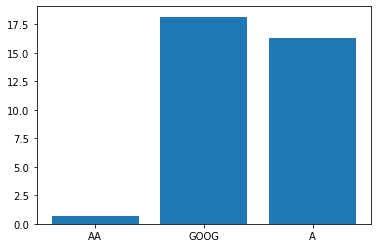

[1222.5, 6931.0, 15697.999999999998]
[ 5.12546381 29.05896904 65.81556716]
Expected Return Bases on CAPM for the portfolio is 16.05%



{'beta': {'AA': 0.04, 'GOOG': 1.08, 'A': 0.97},
 'alpha': {'AA': 30.57, 'GOOG': 0.04, 'A': 0.05},
 'ER': {'AA': 0.67, 'GOOG': 18.16, 'A': 16.31},
 'ER_portfolio': 16.05}

In [114]:
tickers_quantity={'AA':25,'GOOG':50,'A':100}
capm = CAPM(tickers_quantity,dd)
capm.tickers_return(tickers_quantity)